# chap8. 자연어 처리 시작하기

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

- `konlpy`, `JPype1-py3`(JDK 설치 필요), `wordcloud`, `gensim`
- pip로 설치하면 됨.

```python
>>> import nltk
>>> nltk.download()
```

- All Packages -> stopwords, punkt 설치

## 8-2. 한글 자연어 처리 기초

- `KoNLPy`는 꼬꼬마, 한나눔 등의 엔진을 사용할 수 있게 해줌

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

- 꼬꼬마 모듈 사용

In [13]:
kkma.sentences('한국어 분석을 시작합니다 재미있어욤~~')

['한국어 분석을 시작합니다', '재미있어욤~~']

- 문장(sentences) 분석
- 마침표(`.`)가 없어도 두 개의 문장으로 구분

In [2]:
kkma.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석']

- 명사(nouns) 분석도 수행

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

- 형태소(pos) 분석도 수행
- 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근할 수 없음
- 최소한의 의미인 형태소로 언어를 분석하는 것이 일반적

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

- 한나눔 모듈 사용

In [6]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있어욤', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있어욤', 'N'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '욤']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어욤~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '욤', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어욤~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('욤', 'Noun'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

- 워드 클라우드(word cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알림

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add('said')

- 이상한 나라의 앨리스 영문 버전과 앨리스 그리을 저장
- 'said'라는 단어는 카운트에서 제거(너무 많이 나옴)

In [16]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system.')
    
%matplotlib inline

- matplotlib에서 한글 폰트 설정

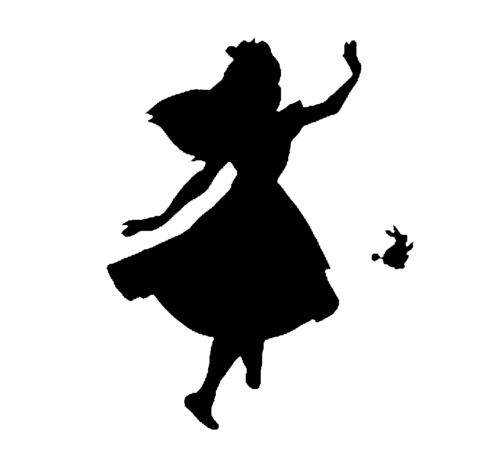

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- 문서 자체에서 단어를 카운트하는 기능을 사용해 최빈 단어를 찾음

In [18]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

- 결과를 앨리스 그림에 겹쳐 보이기

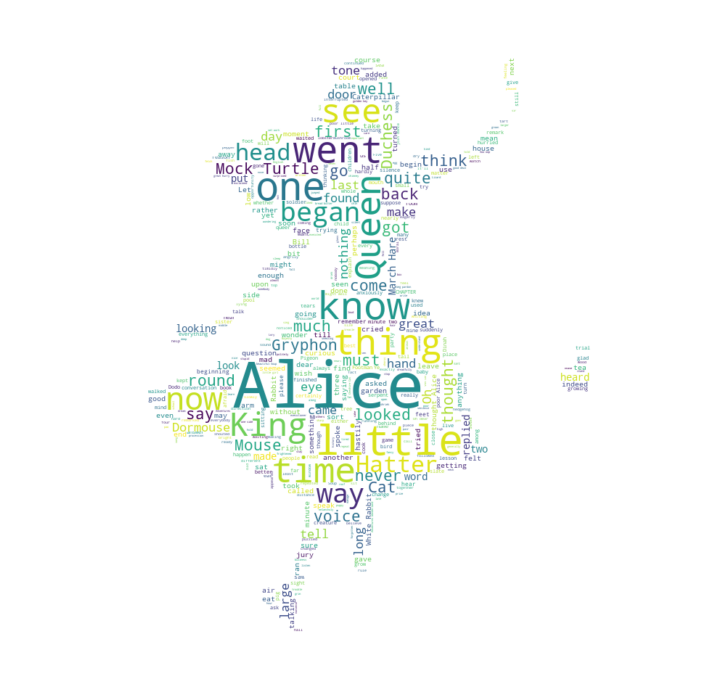

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 스타워즈의 A New Hope 텍스트로 실습

In [20]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

- 특수하게 처리해야 할 단어를 처리

In [21]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

- 워드 클라우드 준비

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

- 전체적으로 회색(grey)으로 채우도록 함수 생성

In [25]:
import random
def grey_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

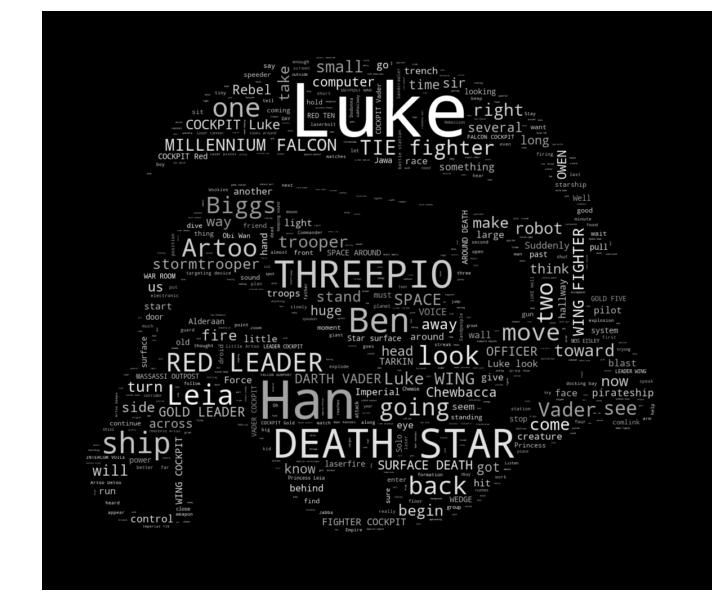

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()